In [1]:
import pandas as pd 
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

# Read the data
df = pd.read_csv('./data/trainingData.csv')


In [2]:
# add the sentiment score to the dataframe add the dictionary rows as columns
df = df.join(pd.DataFrame(df['comment'].apply(sentiment.polarity_scores).tolist()))

In [3]:
df.head()

,comment,sentiment,review_rating,author_total_reviews_count,neg,neu,pos,compound
0,Not telkpm I pay R519 per month and can't sign...,0,1,3,0.000,0.966,0.034,0.0762
1,Please help me clear my name I can't even buy ...,0,1,3,0.050,0.788,0.161,0.8608
2,Untrustworthy business I was contacted if I wa...,0,1,50,0.072,0.900,0.028,-0.5994
3,telkom Have been in a fight with TELKOM since ...,0,1,1,0.203,0.730,0.066,-0.9669
4,"TELKOM Killarney Looting on Upgrade -10, \nSo ...",0,1,5,0.099,0.889,0.013,-0.9837


In [4]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

# use review_rating,author_total_reviews_count,neg,neu,pos,compound as features
train_features = train[['neg','neu','pos','compound']].values
test_features = test[['neg','neu','pos','compound']].values

# sentiment is the label
train_labels = train['sentiment'].values
test_labels = test['sentiment'].values


In [5]:
# use sklearn to do the classification for KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_features, train_labels)
knn.score(test_features, test_labels)

#save model to file
import pickle
pickle.dump(knn, open('./models/knn_model.sav', 'wb'))


<AxesSubplot:>

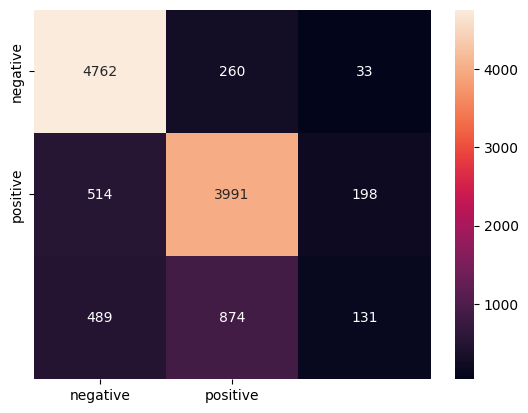

In [6]:
# plot a confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cm = confusion_matrix(test_labels, knn.predict(test_features))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])




29


Text(0, 0.5, 'Testing Accuracy')

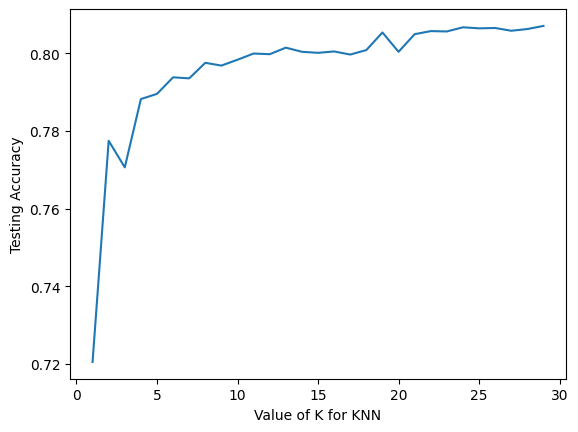

In [14]:
# plot a graph showing the model at different k values
k_range = range(1, 30)
scores = []
bestAccuracy = 0
bestK = 0
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_features, train_labels)
    scores.append(knn.score(test_features, test_labels))
    if knn.score(test_features, test_labels) > bestAccuracy:
        bestAccuracy = knn.score(test_features, test_labels)
        bestK = k
print(bestK)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [15]:
print(bestK)
print(bestAccuracy)

29
0.8070565232847494


In [9]:
#load model from file
import pickle
knn = pickle.load(open('./models/knn_model.sav', 'rb'))


def predict_sentiment(text):
    sen = sentiment.polarity_scores(text)
    score = knn.predict([[sen['neg'],sen['neu'],sen['pos'],sen['compound']]])
    if score == 0:
        return 'negative'
    elif score == 1:
        return 'positive'
    else:
        return 'neutral'

In [16]:
# print accuracy
print(knn.score(test_features, test_labels))

0.8070565232847494


In [18]:
# use a decision tree classifier with GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':('gini', 'entropy'), 'max_depth':[1, 10]}
dtc = DecisionTreeClassifier()
clf = GridSearchCV(dtc, parameters)
clf.fit(train_features, train_labels)
print(clf.best_params_)
#print accuracy with best parameters
print(clf.score(test_features, test_labels))

{'criterion': 'entropy', 'max_depth': 10}
0.8003910415926058


In [19]:
# use a random forest classifier with GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[1, 10]}
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, parameters)
clf.fit(train_features, train_labels)
print(clf.best_params_)
#print accuracy
print(clf.score(test_features, test_labels))


{'n_estimators': 10}
0.781016708140775
